# random selection

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
veriler = pd.read_csv('Ads_CTR_Optimisation.csv')

In [25]:
veriler.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [26]:
veriler.shape

(10000, 10)

In [27]:
import random

N = 10000
d = 10 
toplam = 0
secilenler = []
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = veriler.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    toplam = toplam + odul

In [28]:
random.randrange(d)

9

In [31]:
secilenler

[2,
 1,
 8,
 8,
 6,
 9,
 6,
 6,
 0,
 6,
 0,
 4,
 4,
 1,
 2,
 3,
 7,
 1,
 6,
 0,
 2,
 4,
 6,
 9,
 1,
 3,
 8,
 1,
 8,
 5,
 4,
 1,
 9,
 8,
 2,
 0,
 8,
 4,
 3,
 5,
 5,
 5,
 5,
 4,
 8,
 6,
 1,
 2,
 0,
 2,
 6,
 2,
 5,
 1,
 1,
 2,
 1,
 3,
 4,
 9,
 8,
 3,
 2,
 7,
 2,
 0,
 5,
 9,
 4,
 2,
 1,
 1,
 7,
 0,
 2,
 9,
 9,
 3,
 1,
 5,
 4,
 8,
 0,
 8,
 8,
 7,
 6,
 0,
 2,
 8,
 3,
 2,
 8,
 3,
 2,
 1,
 4,
 9,
 5,
 6,
 7,
 3,
 5,
 8,
 6,
 8,
 1,
 0,
 5,
 7,
 5,
 7,
 0,
 1,
 6,
 5,
 6,
 8,
 8,
 5,
 2,
 1,
 5,
 7,
 0,
 8,
 6,
 6,
 5,
 0,
 5,
 8,
 5,
 2,
 5,
 7,
 5,
 8,
 4,
 6,
 5,
 8,
 5,
 7,
 6,
 9,
 2,
 8,
 3,
 9,
 4,
 6,
 5,
 3,
 9,
 5,
 6,
 1,
 0,
 7,
 2,
 2,
 3,
 3,
 7,
 0,
 4,
 6,
 9,
 9,
 7,
 2,
 6,
 8,
 7,
 9,
 4,
 1,
 8,
 2,
 7,
 1,
 5,
 2,
 4,
 5,
 5,
 3,
 9,
 4,
 5,
 7,
 3,
 0,
 7,
 2,
 8,
 6,
 1,
 5,
 7,
 6,
 0,
 4,
 1,
 2,
 1,
 4,
 2,
 6,
 0,
 2,
 8,
 3,
 7,
 8,
 5,
 8,
 8,
 3,
 8,
 0,
 7,
 6,
 4,
 8,
 2,
 2,
 5,
 2,
 3,
 5,
 5,
 1,
 4,
 6,
 0,
 5,
 2,
 1,
 5,
 9,
 9,
 4,
 3,
 8,
 5,
 3,
 7,
 9,


In [30]:
print("Toplam ödül:",toplam)

Toplam ödül: 1183


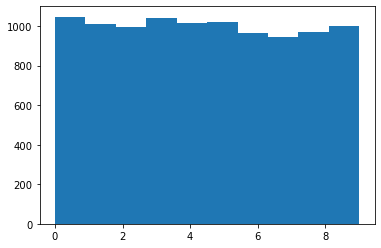

In [32]:
plt.hist(secilenler)
plt.show()

# UCB(upper confidence bound)

In [33]:
# bu algoritmanın özelliği elde edilen tecrübeleri bir sonrakine yansıtıyor olması

In [34]:
import math
#UCB
N = 10000 # 10.000 tıklama
d = 10  # toplam 10 ilan var
#Ri(n)
oduller = [0] * d #ilk basta butun ilanların odulu 0
#Ni(n)
tiklamalar = [0] * d #o ana kadarki tıklamalar
toplam = 0 # toplam odul
secilenler = []
for n in range(1,N):
    ad = 0 #seçilen ilan
    max_ucb = 0
    for i in range(0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2* math.log(n)/tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N*10
        if max_ucb < ucb: #max'tan büyük bir ucb çıktı
            max_ucb = ucb
            ad = i          
    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad]+ 1
    odul = veriler.values[n,ad] # verilerdeki n. satır = 1 ise odul 1
    oduller[ad] = oduller[ad]+ odul
    toplam = toplam + odul
print('Toplam Odul:')   
print(toplam)

Toplam Odul:
2231


In [39]:
tiklamalar

[529, 372, 253, 394, 6187, 144, 283, 1320, 321, 196]

In [40]:
odul

0

In [42]:
oduller

[82, 46, 21, 51, 1675, 1, 27, 283, 35, 10]

In [41]:
secilenler

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 4,
 7,
 8,
 4,
 8,
 4,
 4,
 7,
 8,
 8,
 0,
 1,
 2,
 3,
 5,
 6,
 9,
 4,
 4,
 8,
 4,
 4,
 7,
 0,
 1,
 2,
 3,
 5,
 6,
 9,
 4,
 8,
 7,
 4,
 4,
 8,
 0,
 1,
 2,
 3,
 5,
 6,
 9,
 4,
 7,
 4,
 4,
 4,
 8,
 4,
 0,
 1,
 1,
 2,
 3,
 5,
 6,
 9,
 1,
 7,
 7,
 7,
 7,
 8,
 4,
 4,
 0,
 2,
 3,
 5,
 6,
 9,
 7,
 8,
 8,
 1,
 1,
 4,
 4,
 4,
 8,
 1,
 4,
 7,
 0,
 2,
 3,
 5,
 6,
 9,
 4,
 8,
 1,
 4,
 7,
 8,
 8,
 4,
 0,
 2,
 3,
 5,
 6,
 9,
 9,
 9,
 8,
 1,
 7,
 4,
 4,
 4,
 8,
 9,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 5,
 6,
 7,
 7,
 4,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 4,
 0,
 1,
 9,
 9,
 9,
 2,
 3,
 5,
 6,
 7,
 7,
 8,
 7,
 4,
 8,
 8,
 0,
 1,
 9,
 9,
 9,
 4,
 8,
 7,
 2,
 3,
 5,
 6,
 4,
 8,
 9,
 0,
 1,
 7,
 7,
 7,
 4,
 8,
 2,
 3,
 5,
 6,
 9,
 7,
 4,
 4,
 4,
 4,
 0,
 1,
 8,
 4,
 7,
 2,
 3,
 5,
 6,
 4,
 9,
 8,
 8,
 8,
 0,
 1,
 1,
 1,
 4,
 7,
 8,
 1,
 9,
 2,
 3,
 5,
 6,
 4,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 4,
 1,
 9,
 7,
 8,
 0,
 2,
 3,


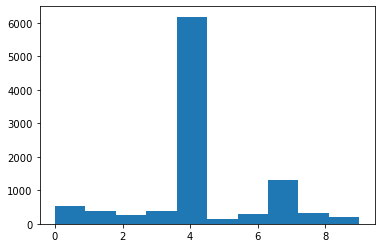

In [35]:
plt.hist(secilenler)
plt.show()

In [38]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]